---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 5 

---

Please write your full name here
- **Name** : "Ahmed Emad Eldeen Ahmed"

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [203]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 0
Set random seed to 47

In [205]:
np.random.seed(47)

# Question 1
Scatter plot the dataset

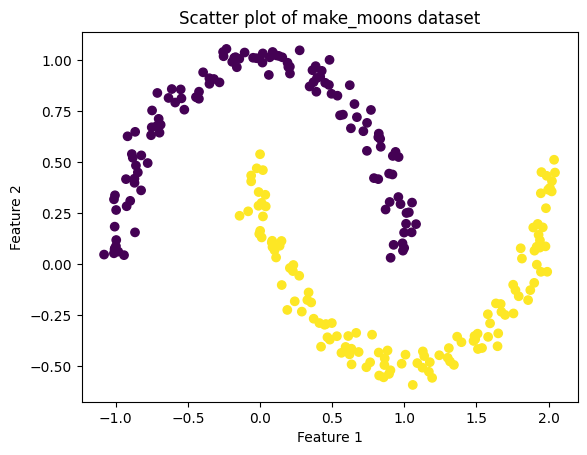

In [206]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of make_moons dataset')
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER:I think that k-means will not perform well on this dataset as the data is spread around so its clear that points wont be able to be clearly split into distinct clusters

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:

#### About First Graph :
For small values of K the sum-squad (interia) is high which indicates that the algorithm is not able to form compact and well-separated clusters.
and when the value of K increases the intertia decreases means a hug number of clusters needed inorder to be able to sparete the data correctly although at  k=15
seems that  algorithm is not getting better and the value of intertia is constant also when the inertia value is zero, it means that each data point is the centroid of its own cluster.
#### About the second graph and results:
The Algorithm has misclassified a larg part of both parts of the data as expected cause the data is spread out

## #1 #2

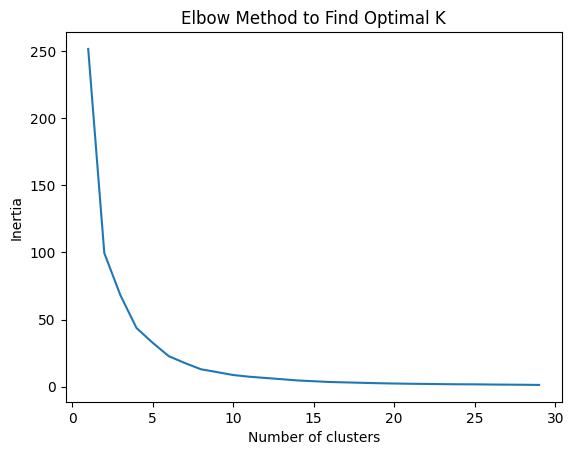

In [207]:
inertias = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 30), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

## #3 #4

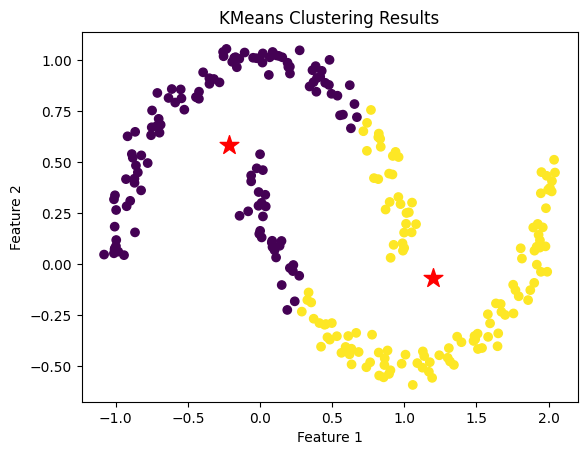

In [208]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

y_pred = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='red')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("KMeans Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##
- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

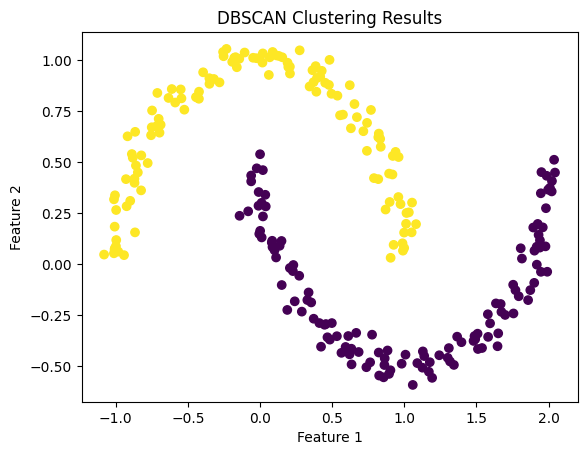

In [209]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3)
y_pred = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

###
 **Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:
DBSCAN can handle nested Clusters better than Kmeans thats why its more effective and efficient to use it for this data as we can see it has made the two clusters much more efficient than kmean

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER:

In [210]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

### Data Visualization After Transformation

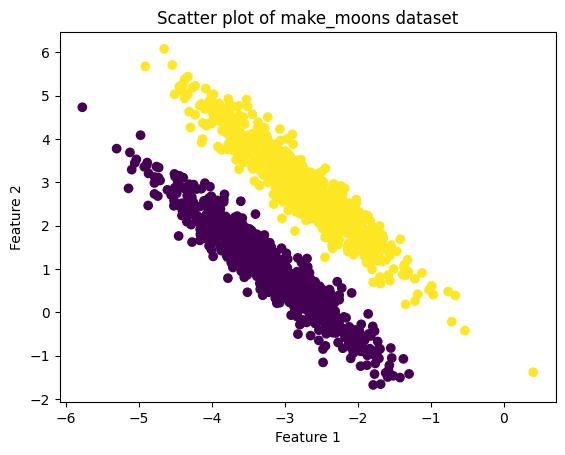

In [211]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of make_moons dataset')
plt.show()

### using data After Transformation 

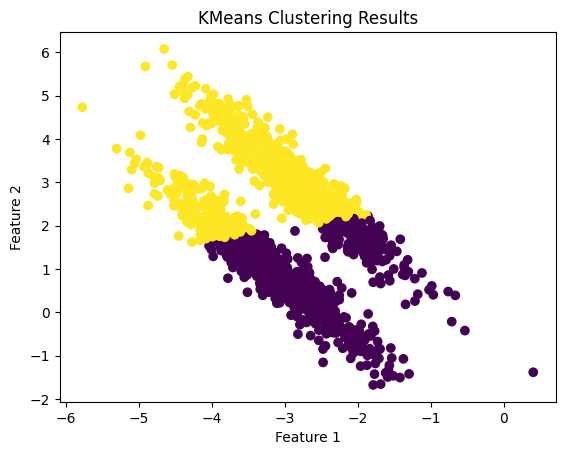

In [212]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_aniso)
y_pred = kmeans.fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("KMeans Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Data visualization Before Transformation

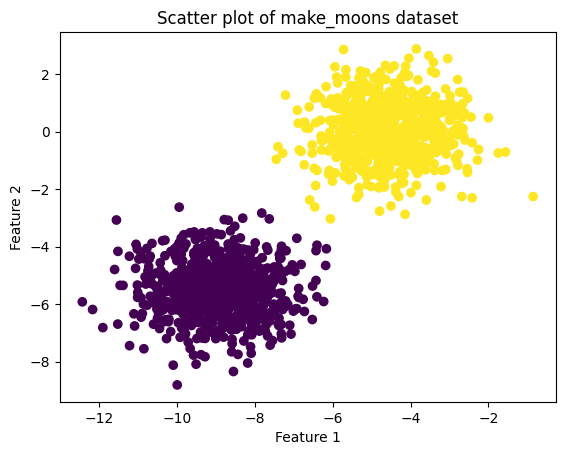

In [213]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of make_moons dataset')
plt.show()

### Using data Before transformation

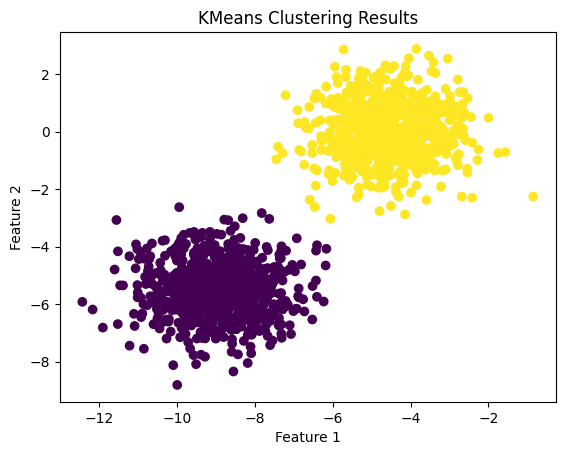

In [214]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("KMeans Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Kmeans fail

K-means clustering is a distance-based algorithm so it failed as When the data is transformed or rotated, the distances between data points may change, which can result in the formation of non-spherical clusters.



# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [215]:
import numpy as np

def cent(num_clusters, X):
    centroids = X[np.random.choice(X.shape[0], num_clusters, replace=False), :]
    clusters = np.zeros(X.shape[0])
    while True:
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        for j in range(num_clusters):
            centroids[j] = np.mean(X[clusters == j], axis=0)
        if np.all(clusters == np.linalg.norm(X[:, None] - centroids, axis=2).argmin(axis=1)):
            break
    return centroids


# Question 6
For the following dataset:

In [216]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels. 
- How many clusters do you see? :
Based on the scatter plot, it looks like there are 4 clusters in the data.

ANSWER:

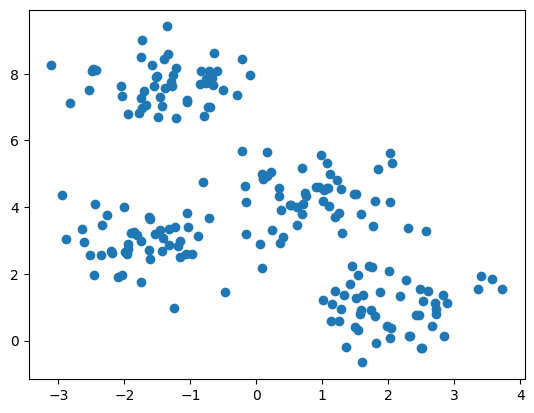

In [217]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

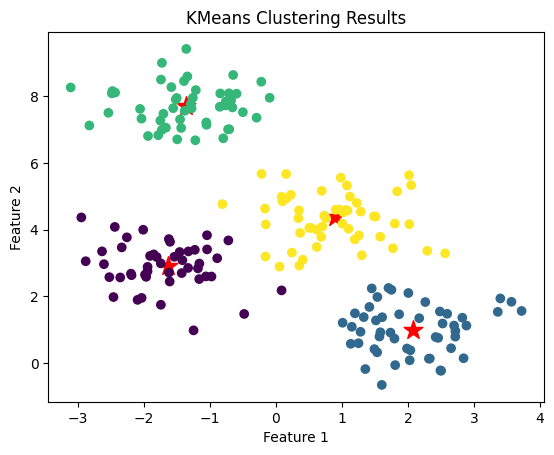

In [218]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
centroids=cent(4,X)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='red')
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("KMeans Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [219]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.25


- Why is the accuracy so low?

ANSWER: As Labels are not updated yet so we need to creat a function to relable them inorder to be able to findout the correct accuracy.

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [220]:
def relabel(n_clusters, true_labels, pred_labels):
    new_labels = [-1] * n_clusters
    for i in range(n_clusters):
        mask = (pred_labels == i)
        cluster_labels = true_labels[mask]
        mode_label = max(set(cluster_labels), key=cluster_labels.tolist().count)
        new_labels[i] = mode_label
    updated_labels = [new_labels[label] for label in pred_labels]
    return updated_labels

In [221]:
new_labels = relabel(4, y, y_pred)

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [222]:
print("Accuracy score is",accuracy_score(y, new_labels) )

Accuracy score is 0.99


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [223]:
import numpy as np
from scipy.spatial.distance import cdist

def k_medoids(n_clusters, X):
    medoids = np.random.choice(X.shape[0], n_clusters, replace=False)
    while True:
        distances = cdist(X, X[medoids],metric='euclidean')
        labels = np.argmin(distances, axis=1)

        new_medoids = np.zeros(n_clusters, dtype=int)
        for i in range(n_clusters):
            cluster_indices = np.where(labels == i)[0]
            cluster_distances = cdist(X[cluster_indices], X[medoids]).sum(axis=1)
            new_medoid_index = cluster_indices[np.argmin(cluster_distances)]
            new_medoids[i] = new_medoid_index
            
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids

    return X[medoids], labels


- Apply YOUR k-medoids clustering algorithm with 4 clusters 
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

## Reading The Data

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('data.csv')

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(data)

## Model parameters

In [225]:
k = 4
medoids, labels = k_medoids(k, X)

## Updating Labels

In [226]:
def update_labels(X, medoids):
    distances = cdist(X, medoids, metric='euclidean')
    return np.argmin(distances, axis=1)
while True:
    old_medoids = medoids.copy()
    labels = update_labels(X, medoids)
    for i in range(k):
        cluster_indices = np.where(labels == i)[0]
        if len(cluster_indices) == 0:
            medoids[i] = X[np.random.choice(X.shape[0], 1)[0]]
        else:
            medoids[i] = X[cluster_indices].mean(axis=0)
    if np.array_equal(medoids, old_medoids):
        break


## Plotting

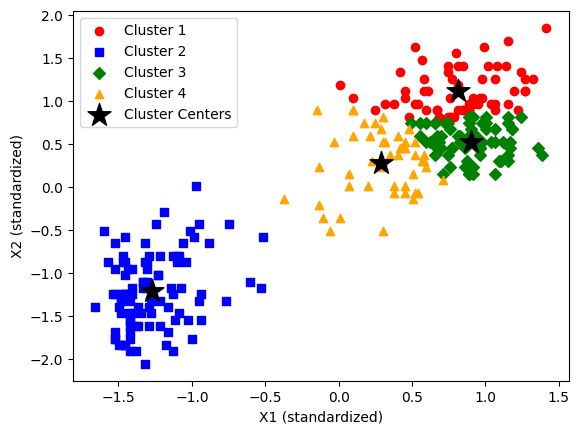

In [227]:
colors = ['red', 'blue', 'green', 'orange']
symbols = ['o', 's', 'D', '^']
for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], c=colors[i], marker=symbols[i], label=f'Cluster {i+1}')
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='*', s=300, label='Cluster Centers')
plt.xlabel('X1 (standardized)')
plt.ylabel('X2 (standardized)')
plt.legend()
plt.show()